In [2]:
import pandas as pd
import numpy as np
from config import CLEANED_ART, EMBEDDINGS, METADATA

In [6]:
df = pd.read_csv(CLEANED_ART)
print(df['abstract'].head().tolist())

['A fully differential calculation in perturbative quantum chromodynamics is presented for the production of massive photon pairs at hadron colliders. All next-to-leading order perturbative contributions from quark-antiquark, gluon-(anti)quark, and gluon-gluon subprocesses are included, as well as all-orders resummation of initial-state gluon radiation valid at next-to-next-to-leading logarithmic accuracy. The region of phase space is specified in which the calculation is most reliable. Good agreement is demonstrated with data from the Fermilab Tevatron, and predictions are made for more detailed tests with CDF and DO data. Predictions are shown for distributions of diphoton pairs produced at the energy of the Large Hadron Collider (LHC). Distributions of the diphoton pairs from the decay of a Higgs boson are contrasted with those produced from QCD processes at the LHC, showing that enhanced sensitivity to the signal can be obtained with judicious selection of events.', 'We describe a 

In [7]:
print(df.columns)

Index(['id', 'title', 'abstract', 'year', 'authors', 'categories', 'journal'], dtype='object')


In [3]:
embs = np.load(EMBEDDINGS)
meta = pd.read_csv(METADATA)
print(embs.shape, meta.shape)
print("Ejemplo:", meta.iloc[0].to_dict(), embs[0][:5])

(50000, 384) (50000, 6)
Ejemplo: {'id': 704.0001, 'title': 'Calculation of prompt diphoton production cross sections at Tevatron and LHC energies', 'year': 2008, 'authors': "[['Balázs', 'C.', ''], ['Berger', 'E. L.', ''], ['Nadolsky', 'P. M.', ''], ['Yuan', 'C. -P.', '']]", 'categories': 'hep-ph', 'journal': 'Phys.Rev.D76:013009,2007'} [-0.15493952 -0.00654361  0.00059371  0.04457912  0.00745803]


In [4]:
import umap
reducer = umap.UMAP(n_components=2)
vis = reducer.fit_transform(embs[:2000])

/home/edu/anaconda3/envs/art_rec/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/edu/anaconda3/envs/art_rec/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


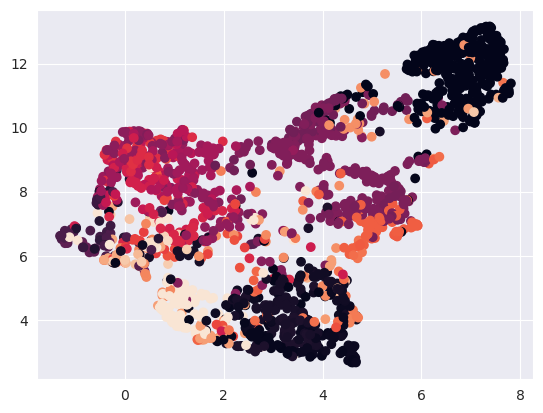

In [17]:
import matplotlib.pyplot as plt

main_cat = meta['categories'].values[:2000]
main_cat = [cat.split()[0] for cat in main_cat]

# Asign a number to each category
cat2num = {cat: i for i, cat in enumerate(np.unique(main_cat))}
main_cat = [cat2num[cat] for cat in main_cat]

plt.scatter(vis[:, 0], vis[:, 1], c=main_cat)
plt.show()